### Instructions
The dataset you'll be working with contains an airline passenger satisfaction survey. There are two primary questions of interest with this dataset:

- Can you predict passenger satisfaction?
- What factors are associated with passenger satisfaction?
### The variables are:

1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

The two data files are meant to combined into a single dataset for your work.

### Project Specs

- While the focus of our course is advanced machine learning, your work on this project will be assessed on at least the following things:
    - Your data preparation/pre-processing
    - Your exploratory data analysis (EDA)
    - Your modeling/ML efforts, comparisons, interpretations, and conclusions
    - Your project narrative
    - You should also comment (probably after the bulk of your work) on the data itself, possible sources for these data, and the possible issues that should be considered when working with this kind of survey data. 
        - In particular, I would encourage you to make specific criticisms of the dataset and survey as you understand them, and possibly even make suggestions for how to improve them if they were to be administered again.
        - Who can you generalize your work and results too? How helpful is all of this to an airline?
- Your submission should be built and written with non-experts as the target audience. All of your code should still be included, but do your best to narrate your work in accessible ways.

### Import Datasets

In [3]:
import pandas as pd

df1 = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB545ADML/Week5/data1.csv")
df2 = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB545ADML/Week5/data2.csv")

df = pd.concat([df1, df2], ignore_index=True)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### Cleaning Process
First we will check the distribution of our target variable.

In [5]:
print(df.value_counts("satisfaction"))

print("\nSatisfaction Percent:  " + str(56428/ (56428 + 73452) * 100))

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

Satisfaction Percent:  43.44625808438558


We find there is some variation in satisfaction but having a 43/57 split gives enough data to clearly model both conditions.

Next we can drop any NaN values and all unneeded columns that wont help our modeling results.

In [4]:
df = df.dropna()
df_drop = df.drop("Unnamed: 0", axis = 1)
df_dropped = df_drop.drop("id", axis = 1)

Next let us investigate some distribution to ensure there are no crazy outliers and to get a sense of the data.

In [23]:
# df_dropped.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### Numerical

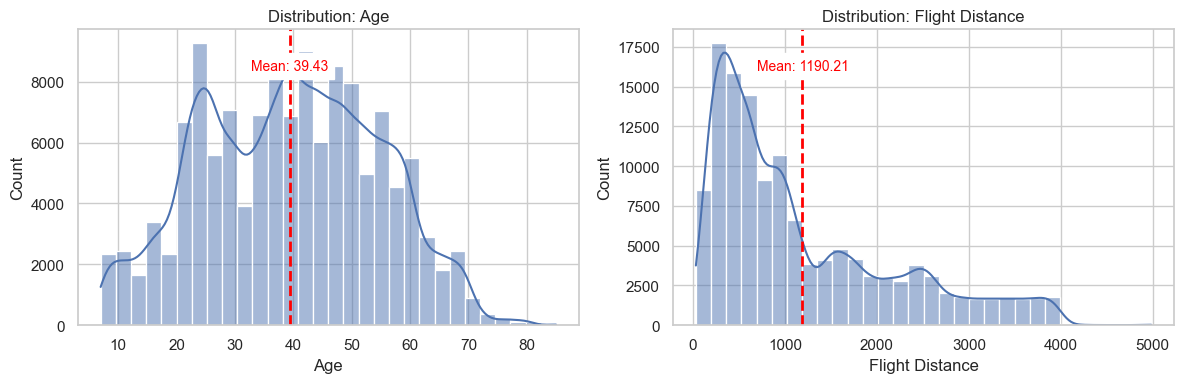

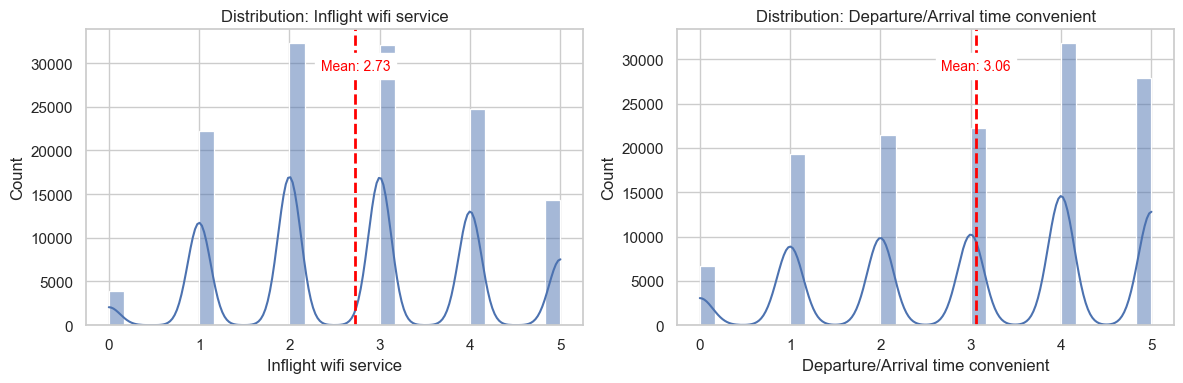

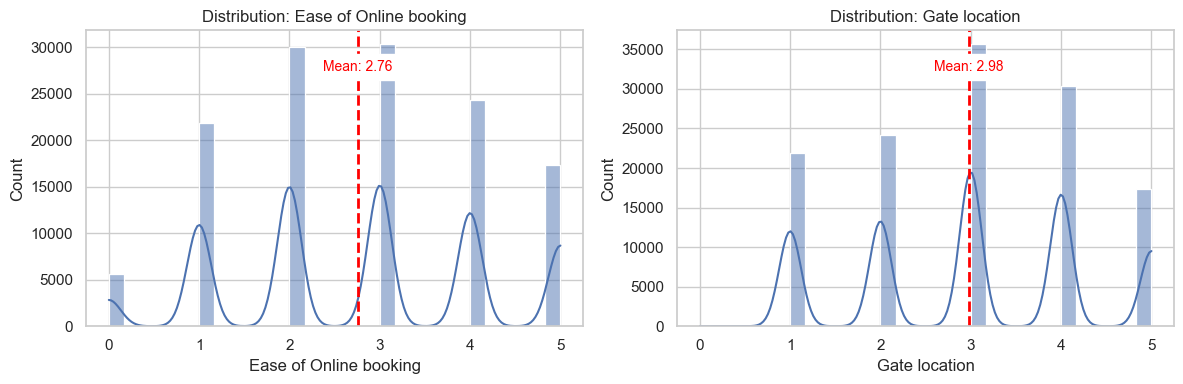

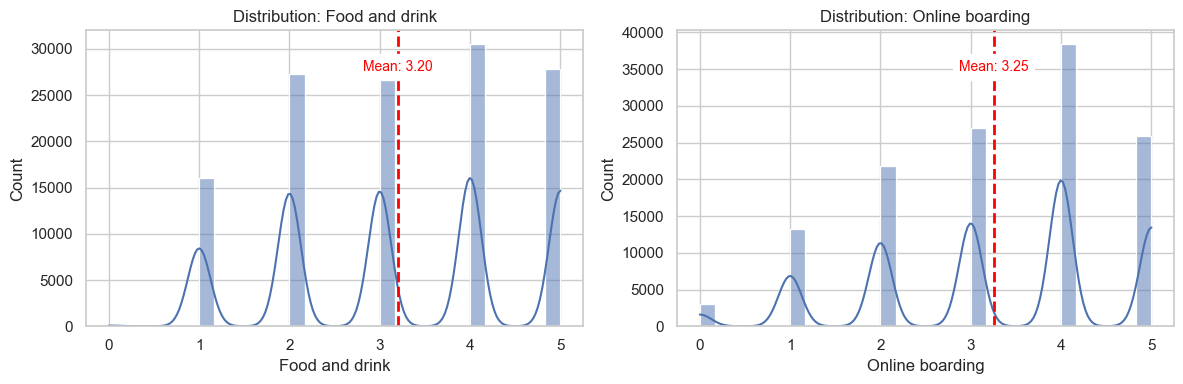

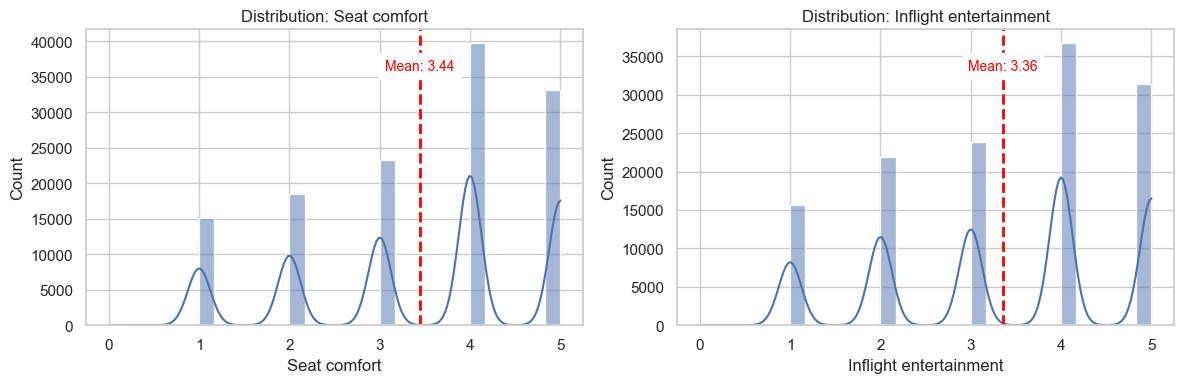

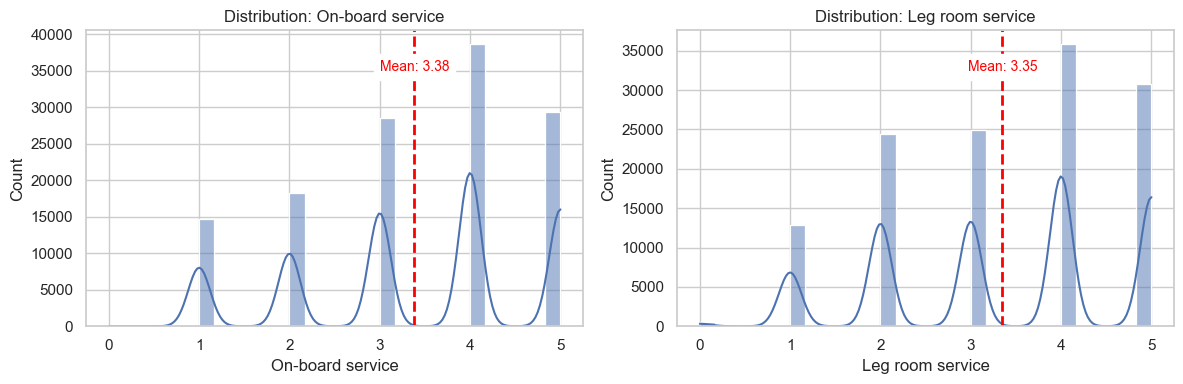

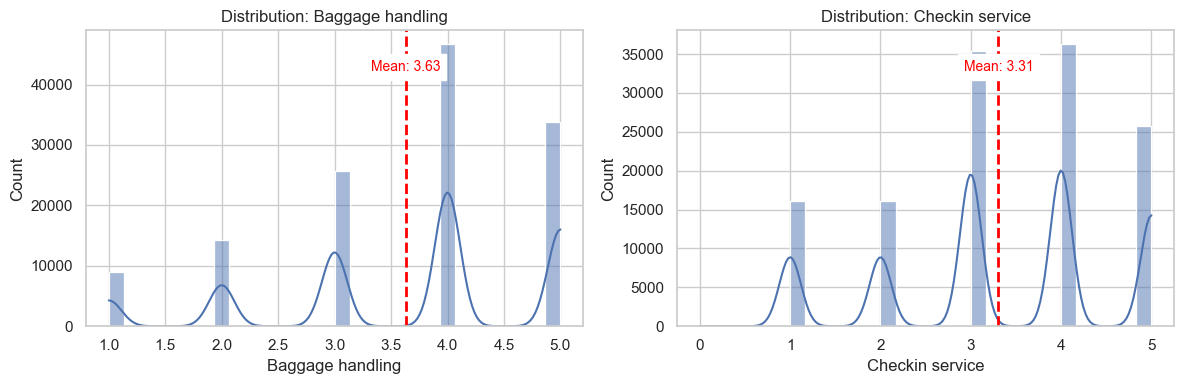

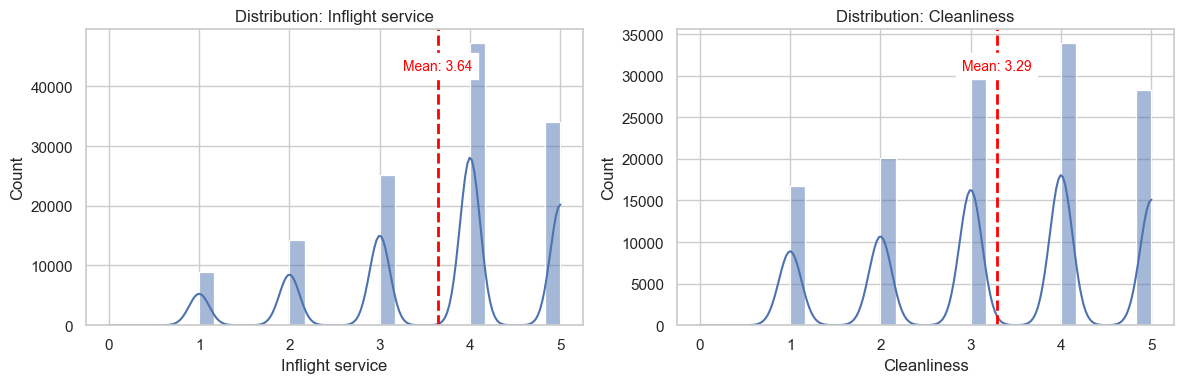

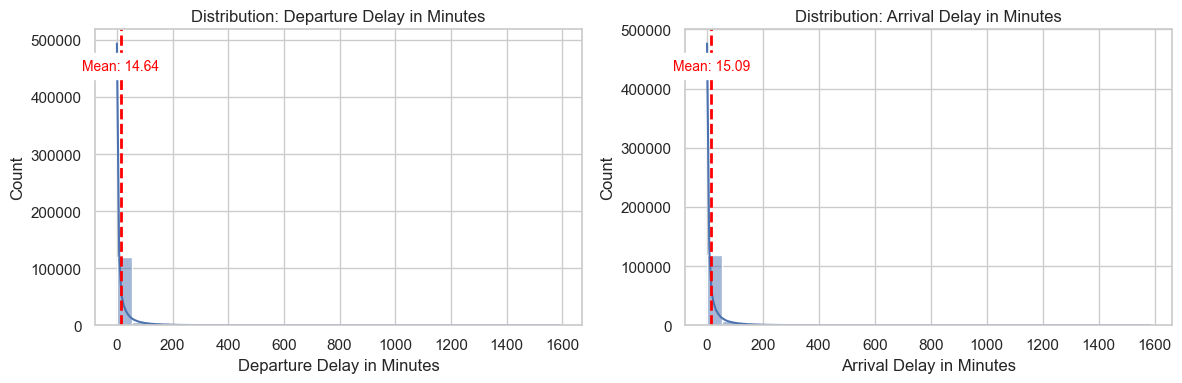

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Separate types
numeric_cols = df_dropped.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df_dropped.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")

# Plot two numeric distributions per row with mean lines
for i in range(0, len(numeric_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    for j in range(2):
        if i + j < len(numeric_cols):
            col = numeric_cols[i + j]
            ax = axes[j]

            # Plot histogram
            sns.histplot(df_dropped[col], kde=True, bins=30, ax=ax)
            
            # Compute mean
            mean_val = df_dropped[col].mean()
            
            # Add vertical line and label
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2)
            ax.text(mean_val, ax.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', 
                    color='red', fontsize=10, ha='center', va='top', backgroundcolor='white')
            
            ax.set_title(f'Distribution: {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

#### Categorical

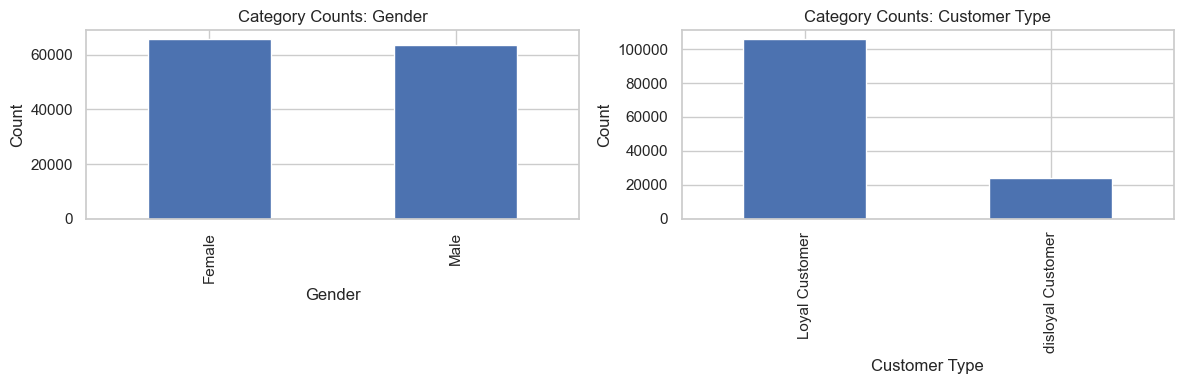

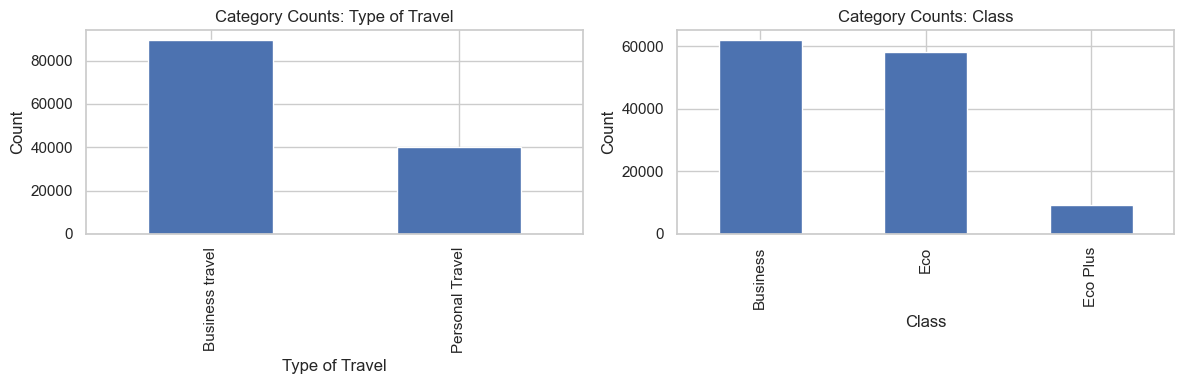

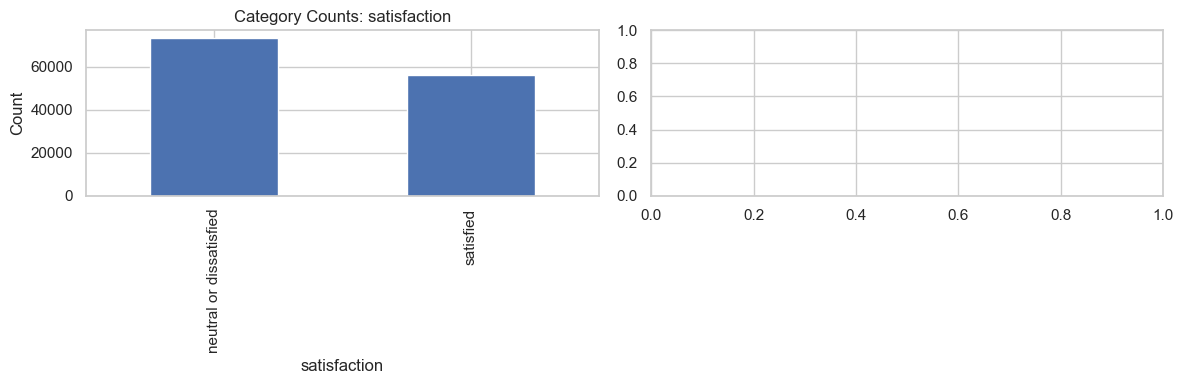

In [29]:
categorical_cols = df_dropped.select_dtypes(include=['object', 'category']).columns

# Helper function to plot in grid (2 per row)
def plot_in_pairs(columns, plot_func, plot_type='numeric'):
    for i in range(0, len(columns), 2):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        for j in range(2):
            if i + j < len(columns):
                col = columns[i + j]
                ax = axes[j]

                if plot_type == 'numeric':
                    sns.histplot(df_dropped[col], kde=True, bins=30, ax=ax)
                    ax.set_title(f'Distribution: {col}')
                else:  # categorical
                    df_dropped[col].value_counts(dropna=False).plot(kind='bar', ax=ax)
                    ax.set_title(f'Category Counts: {col}')

                ax.set_xlabel(col)
                ax.set_ylabel('Count')

        plt.tight_layout()
        plt.show()

# Plot categorical side-by-side
plot_in_pairs(categorical_cols, plt.bar, plot_type='categorical')

From the looks of the distributions there are no outliers to be concerned about. All numerical variables have expected distributions and rating variables (for example *Seat Comfort*) have averages hovering around 3 out of 5, a natural middle rating. As for the categorical variables we do see some unbalanced categories with *Type of Travel* and *Customer Type*, but not to a level of concern. Thus, we can continue to setting up our model.

### Prepare for Modeling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Code satisfaction as 0 or 1
def categorize_satisfaction(x):
    if x == "satisfied":
        return 1
    else:
        return 0

# Apply categorization
df_dropped['satisfaction'] = df_dropped['satisfaction'].apply(categorize_satisfaction)

# Satisfaction as predictor
X = df_dropped.drop(columns=["satisfaction"])
y = df_dropped["satisfaction"]

# Satisfy categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now that we have our target and predictor data scaled and dummied and broke up into a train/test split we can go on to exploring some different model types.

### Model Exploration
#### 1. Bagging
##### Tune number of trees

In [48]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 200] #500, 2000
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.959 (0.002)
>50 0.961 (0.002)
>100 0.962 (0.002)
>200 0.962 (0.002)


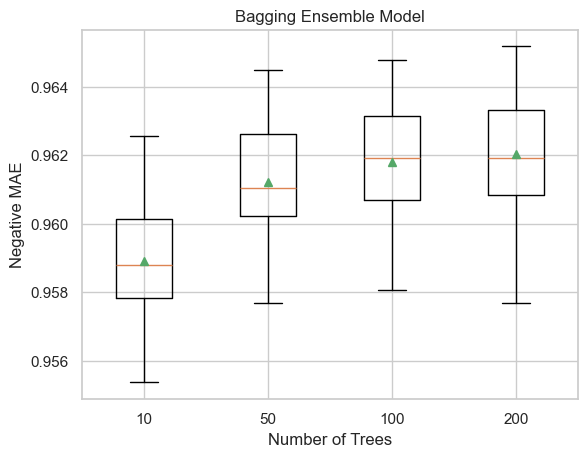

In [50]:
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Trees")
pyplot.ylabel("Negative MAE")
pyplot.title("Bagging Ensemble Model")
pyplot.show()

Here we see we get a best model when using 100 trees without getting so in depth. If we were to use the model with a similar accuracy score, at 200 trees, the model may be more robust, but much slower. Thus, 100 tress is the perfect choice.

##### Tune number of samples

In [55]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 0.6, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i, n_estimators=100)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

Python(41734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


>0.1 0.957 (0.002)
>0.2 0.960 (0.001)
>0.3 0.961 (0.002)
>0.4 0.962 (0.002)
>0.5 0.962 (0.002)


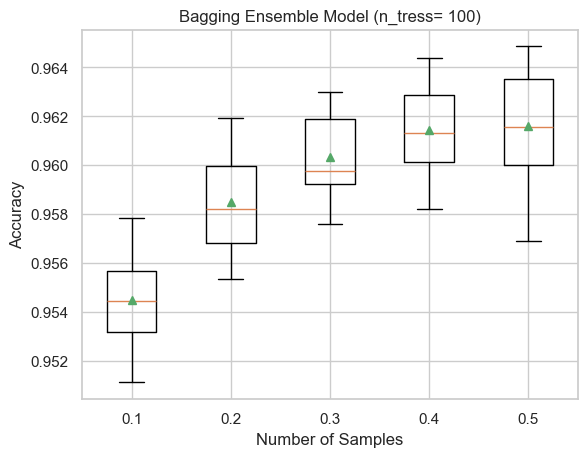

In [66]:
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Samples")
pyplot.ylabel("Accuracy")
pyplot.title("Bagging Ensemble Model (n_tress= 100)")
pyplot.show()

Here we see that the best max samples should be 0.5. This tells the model what percent of data each model is allowed to see, introducing variability and potentially improving the models ability.

Thus our best Bagging model has 
 ```
n_samples= 100
max_samples= 0.5
 ```

#### 2. Random Forest
##### Tune Sample Size

In [60]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 0.6, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

Python(42384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


>0.1 0.954 (0.002)
>0.2 0.959 (0.002)
>0.3 0.960 (0.002)
>0.4 0.961 (0.002)
>0.5 0.962 (0.002)


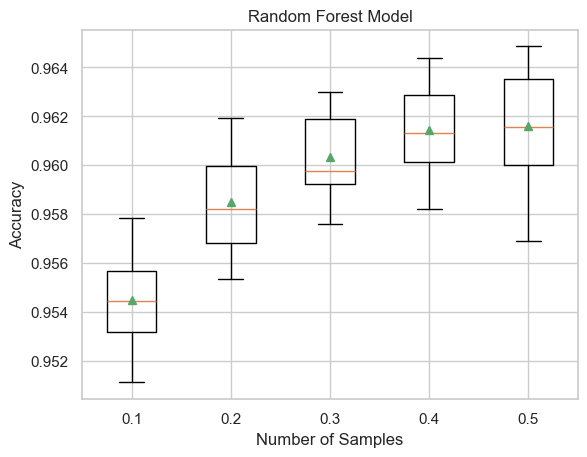

In [62]:
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Samples")
pyplot.ylabel("Accuracy")
pyplot.title("Random Forest Model")
pyplot.show()

Here we see a rise in accuracy at every stage except with the last two where they are plateauing. Thus we will take the sampling with the highest accuracy here at 0.5.

##### Tune number of trees

In [67]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 200, 500, 1000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

Python(42650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(42657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


>10 0.957 (0.002)
>50 0.962 (0.002)
>100 0.963 (0.002)
>200 0.963 (0.002)
>500 0.963 (0.002)


Python(43407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


>1000 0.963 (0.002)


In [ ]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Trees")
pyplot.ylabel("Accuracy")
pyplot.title("Random Forest Model")
pyplot.show()

Our plot is not rendering here, but based on our checkpoints the best number of trees looks to be 100 since it is the first time we get an accuracy of 0.93.

#### Tune number of features

In [6]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 10
    for i in range(1,11):
        models[str(i)] = RandomForestClassifier(max_features=i, n_estimators=100)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.950 (0.002)
>2 0.958 (0.002)
>3 0.961 (0.002)
>4 0.963 (0.002)
>5 0.963 (0.002)
>6 0.964 (0.002)
>7 0.964 (0.001)
>8 0.964 (0.001)
>9 0.964 (0.002)
>10 0.964 (0.002)


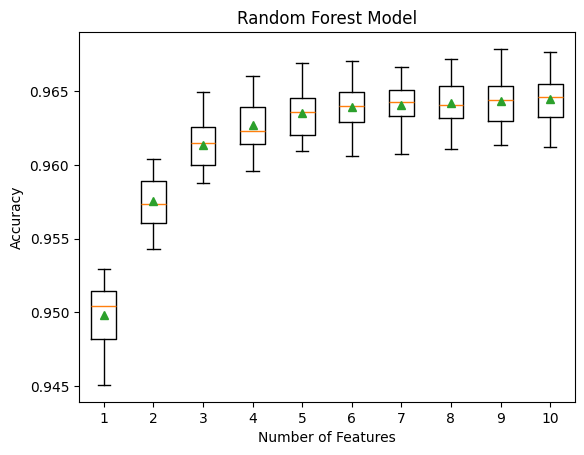

In [8]:
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Features")
pyplot.ylabel("Accuracy")
pyplot.title("Random Forest Model")
pyplot.show()

Max_features tells us the number umber of features to consider when looking for best split. Here we see our best accuracy so far at 0.964 with a small standard deviation at 7 features.
#### Tune Tree Depth

In [12]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider tree depths from 1 to 5 and None=full
    depths = [i for i in range(3,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>3 0.895 (0.003)
>4 0.906 (0.003)
>5 0.921 (0.003)
>6 0.929 (0.002)
>7 0.933 (0.002)
>None 0.963 (0.002)


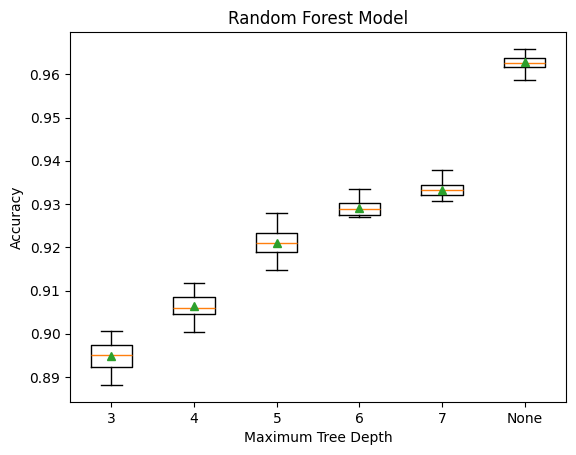

In [14]:
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Maximum Tree Depth")
pyplot.ylabel("Accuracy")
pyplot.title("Random Forest Model")
pyplot.show()

Here we clearly see that having no limit on tree depth gives us a much higher accuracy score.

Thus our best random forrest model has
```
 max_samples= 0.5
 n_estimators= 100
 max_features= 7
 max_depth = None
 ```
 

#### 3. Stacking

In [16]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from matplotlib import pyplot as plt

# Generate a classification dataset
X_encoded, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                                   n_redundant=5, random_state=1)

# Get a stacking ensemble of models
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svc', SVC(probability=True)))  # SVC needs probability=True for stacking
    level0.append(('bag', BaggingClassifier(n_estimators=100)))
    level0.append(('rf', RandomForestClassifier(n_estimators=100)))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# Get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bag'] = BaggingClassifier(n_estimators=100)
    models['rf'] = RandomForestClassifier(n_estimators=100)
    models['stacking'] = get_stacking()
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Evaluate the models
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_encoded, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.042)
>svm 0.957 (0.020)
>bag 0.902 (0.034)
>rf 0.923 (0.027)
>stacking 0.952 (0.019)


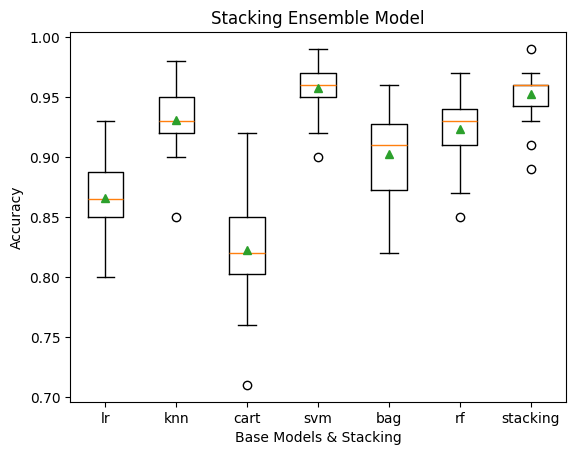

In [19]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Base Models & Stacking")
pyplot.ylabel("Accuracy")
pyplot.title("Stacking Ensemble Model")
pyplot.show()

Here we can see we only are going to want to use knn, svm, bag, and rf in order to get the best stacking result.

Thus best stacking model has
```
knn
svm
bag
rf
```

#### 4. AdaBoosting
##### Tune number of iterations

In [35]:
# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider estimators from 1 to 1000
    n_est = [1, 10, 50, 100, 200, 500, 1000]
    for n in n_est:
        models[str(n)] = AdaBoostClassifier(n_estimators= n, algorithm='SAMME')
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.693 (0.034)
>10 0.793 (0.042)
>50 0.859 (0.036)
>100 0.861 (0.037)
>200 0.870 (0.032)
>500 0.871 (0.026)
>1000 0.869 (0.030)


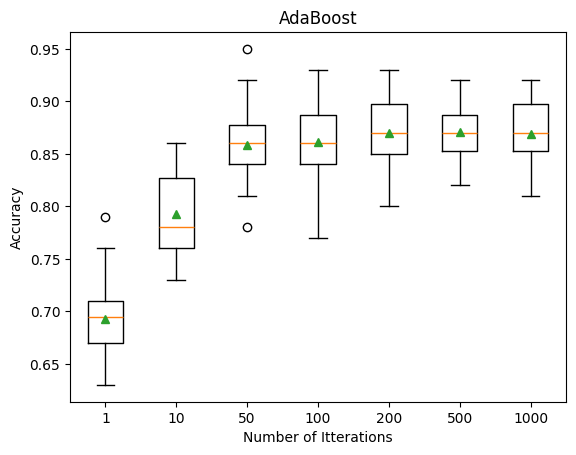

In [36]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Itterations")
pyplot.ylabel("Accuracy")
pyplot.title("AdaBoost")
pyplot.show()

n_estimators determines how many times this process is repeated, we see here that we get the best results with 500 iterations.

##### Tune learning rate

In [31]:
import numpy as np

# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider estimators from 1 to 200
    for i in np.arange(0.1, 2, 0.1):
        models[str(i)] = AdaBoostClassifier(learning_rate= i, n_estimators=100,  algorithm='SAMME')
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.817 (0.038)
>0.2 0.830 (0.042)
>0.30000000000000004 0.845 (0.040)
>0.4 0.850 (0.040)
>0.5 0.853 (0.039)
>0.6 0.852 (0.043)
>0.7000000000000001 0.858 (0.040)
>0.8 0.862 (0.037)
>0.9 0.858 (0.034)
>1.0 0.861 (0.037)
>1.1 0.867 (0.033)
>1.2000000000000002 0.862 (0.034)
>1.3000000000000003 0.862 (0.028)
>1.4000000000000001 0.859 (0.035)
>1.5000000000000002 0.854 (0.035)
>1.6 0.854 (0.028)
>1.7000000000000002 0.848 (0.027)
>1.8000000000000003 0.842 (0.029)
>1.9000000000000001 0.811 (0.039)


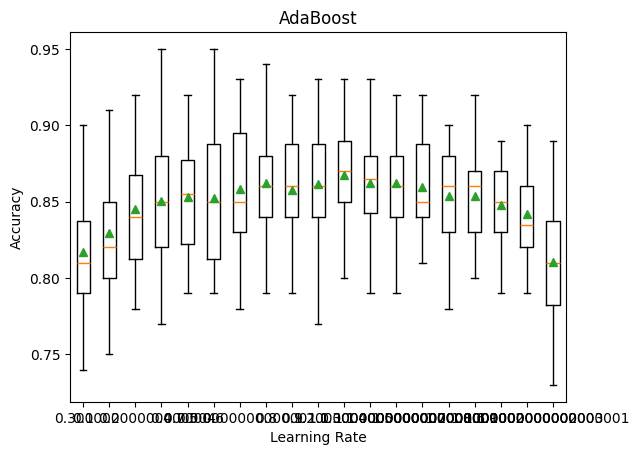

In [33]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Learning Rate")
pyplot.ylabel("Accuracy")
pyplot.title("AdaBoost")
pyplot.show()

Learning rate controls how much influence each new weak learner has on the final model. Here we see the best rate is 1.1.

Thus best AdaBoosting model has
```
n_estimators= 500
learning_rate= 1.1
```

#### 5. Gradient Boost
##### Tune number of iterations

In [38]:
# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider estimators from 1 to 200
    n_est = [1, 10, 50, 100, 200, 500, 1000]
    for n in n_est:
        models[str(n)] = GradientBoostingClassifier(n_estimators= n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.766 (0.044)
>10 0.831 (0.049)
>50 0.897 (0.033)
>100 0.919 (0.028)
>200 0.931 (0.025)
>500 0.936 (0.020)
>1000 0.937 (0.020)


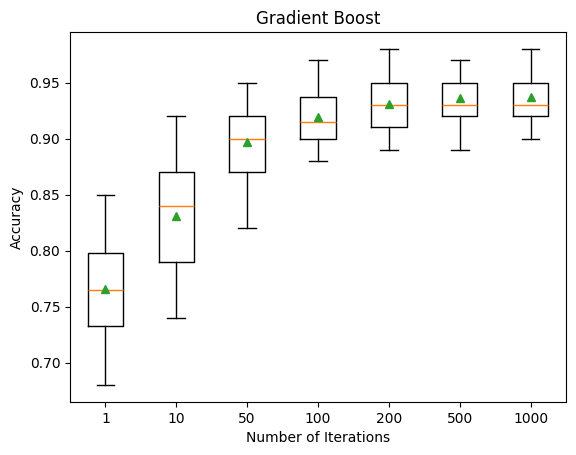

In [40]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Iterations")
pyplot.ylabel("Accuracy")
pyplot.title("Gradient Boost")
pyplot.show()

Here the best is 1000 estimators.

##### Tune learning rate

In [44]:
import numpy as np

# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider learn rate from 1 to 200
    for i in np.arange(0.1, 2.1, 0.1):
        models[str(i)] = GradientBoostingClassifier(learning_rate= i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.919 (0.028)
>0.2 0.929 (0.026)
>0.30000000000000004 0.934 (0.023)
>0.4 0.932 (0.027)
>0.5 0.930 (0.023)
>0.6 0.928 (0.023)
>0.7000000000000001 0.932 (0.024)
>0.8 0.926 (0.025)
>0.9 0.924 (0.026)
>1.0 0.918 (0.038)
>1.1 0.918 (0.028)
>1.2000000000000002 0.911 (0.035)
>1.3000000000000003 0.919 (0.023)
>1.4000000000000001 0.913 (0.024)
>1.5000000000000002 0.910 (0.034)
>1.6 0.908 (0.035)
>1.7000000000000002 0.877 (0.075)
>1.8000000000000003 0.838 (0.092)
>1.9000000000000001 0.781 (0.142)
>2.0 0.736 (0.148)


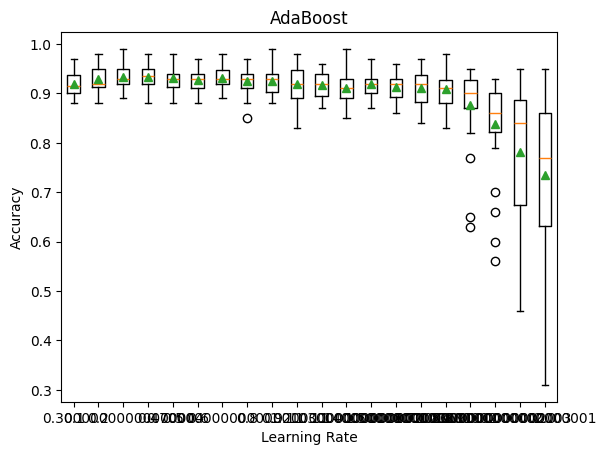

In [45]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Learning Rate")
pyplot.ylabel("Accuracy")
pyplot.title("Gradient Boost")
pyplot.show()

Best learning rate at 1.3.

Thus the best Gradient Boosting model has
```
n_estimators= 1000
learning_rate= 0.3
```

#### 6. XGBoost
##### Tune estimators

In [48]:
import xgboost

# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider estimators from 1 to 200
    n_est = [1, 10, 50, 100, 200, 500, 1000]
    for n in n_est:
        models[str(n)] = XGBClassifier(n_estimators= n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.825 (0.047)
>10 0.900 (0.033)
>50 0.924 (0.028)
>100 0.926 (0.026)
>200 0.927 (0.023)
>500 0.927 (0.025)
>1000 0.927 (0.024)


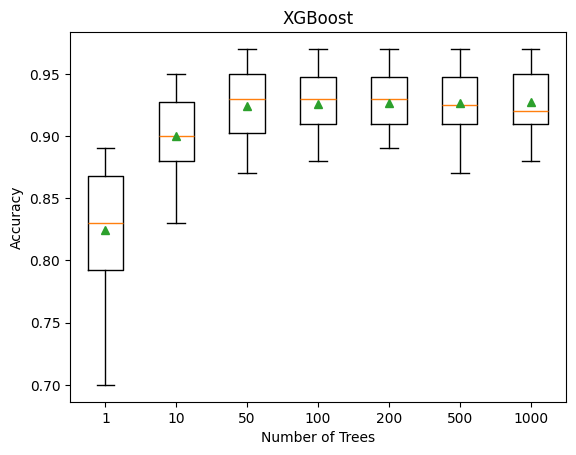

In [51]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Number of Trees")
pyplot.ylabel("Accuracy")
pyplot.title("XGBoost")
pyplot.show()

XGBoost builds trees one at a time, each trying to fix the errors made by the previous trees and n_estimators controls how many trees are added to the model. Here we see the best number of trees is 200.

##### Tune learning rate

In [54]:
# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider learn rate from 1 to 200
    for i in np.arange(0.1, 2.1, 0.1):
        models[str(i)] = XGBClassifier(learning_rate= i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.928 (0.026)
>0.2 0.925 (0.023)
>0.30000000000000004 0.926 (0.026)
>0.4 0.923 (0.025)
>0.5 0.925 (0.029)
>0.6 0.926 (0.026)
>0.7000000000000001 0.920 (0.027)
>0.8 0.927 (0.026)
>0.9 0.921 (0.029)
>1.0 0.918 (0.027)
>1.1 0.913 (0.031)
>1.2000000000000002 0.910 (0.034)
>1.3000000000000003 0.908 (0.032)
>1.4000000000000001 0.908 (0.030)
>1.5000000000000002 0.900 (0.034)
>1.6 0.892 (0.038)
>1.7000000000000002 0.890 (0.035)
>1.8000000000000003 0.884 (0.033)
>1.9000000000000001 0.870 (0.046)
>2.0 0.849 (0.089)


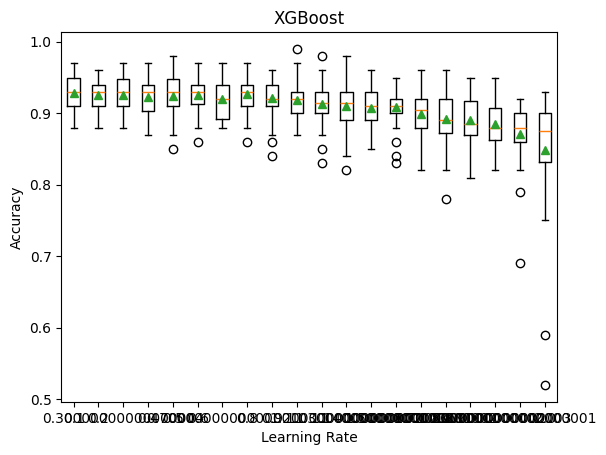

In [56]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Learning Rate")
pyplot.ylabel("Accuracy")
pyplot.title("XGBoost")
pyplot.show()

Here we see the best learning rate is 0.1, also having no outliers is important here.

Thus, the best XGBoosting model has
```
n_estimators= 200
learning_rate= 0.1
```

#### 7. Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# explore AdaBoost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

 
# get a list of models to evaluate
def get_models():
    models = dict()
    # consider learn rate from 1 to 200
    for i in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
        models[str(i)] = nn_classifier = MLPClassifier(
    hidden_layer_sizes=(64,),      # One hidden layer with 64 neurons
    activation='logistic',         # Activation function: 'relu', 'tanh', 'logistic' (sigmoid)
    solver='adam',                 # Optimizer: 'adam' is usually best
    alpha=i,                       # L2 regularization
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=500,                  # Max training iterations
    early_stopping=True,           # Stop early if no improvement
    n_iter_no_change=50,           # Number of iterations with no improvement to stop
    random_state=42
)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_encoded, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>1e-06 0.873 (0.029)
>1e-05 0.873 (0.029)
>0.0001 0.873 (0.029)
>0.001 0.873 (0.029)
>0.01 0.872 (0.029)
>0.1 0.869 (0.029)
>1 0.862 (0.029)


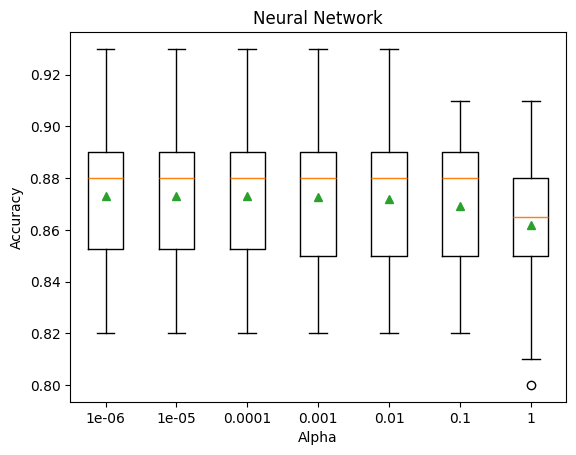

In [64]:
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xlabel("Alpha")
pyplot.ylabel("Accuracy")
pyplot.title("Neural Network")
pyplot.show()

Here we can see that the nn model is not predicting accuracy as well as the others, but the best alpha found is 1e-06.

### Model Selection
#### Optimal Models

In [13]:
# Models for stacking
stack_model = [ ('knn', KNeighborsClassifier()), ('svc', SVC(probability=True)), ('bag', BaggingClassifier(n_estimators=100)), ('rf', RandomForestClassifier(n_estimators=100))]
# Define best models from exploration stage

models = {
    'Bagging': BaggingClassifier(n_estimators= 100, max_samples= 0.5),
    'Random Forest': RandomForestClassifier(n_estimators= 100, max_samples= 0.5, max_features= 7, max_depth= None),
    'Stacking': StackingClassifier(
    estimators=stack_model,
    final_estimator=LogisticRegression(),
    passthrough=True,                    
    cv=3,
    n_jobs=-1
),
    'AdaBoost': AdaBoostClassifier(n_estimators= 500, learning_rate= 1.1),
    'Gradient Boost': GradientBoostingClassifier(n_estimators= 1000, learning_rate= 0.3),
    'XGBoost': XGBClassifier(n_estimators= 200, learning_rate= 0.1),
    'Neural Network': MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=500,
    early_stopping=True,
    n_iter_no_change=50,
    random_state=42
)
}

In [14]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.5f}")

Bagging Accuracy: 0.96266
Random Forest Accuracy: 0.96285
Stacking Accuracy: 0.96197


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.92961
Gradient Boost Accuracy: 0.95992
XGBoost Accuracy: 0.96409
Neural Network Accuracy: 0.95841


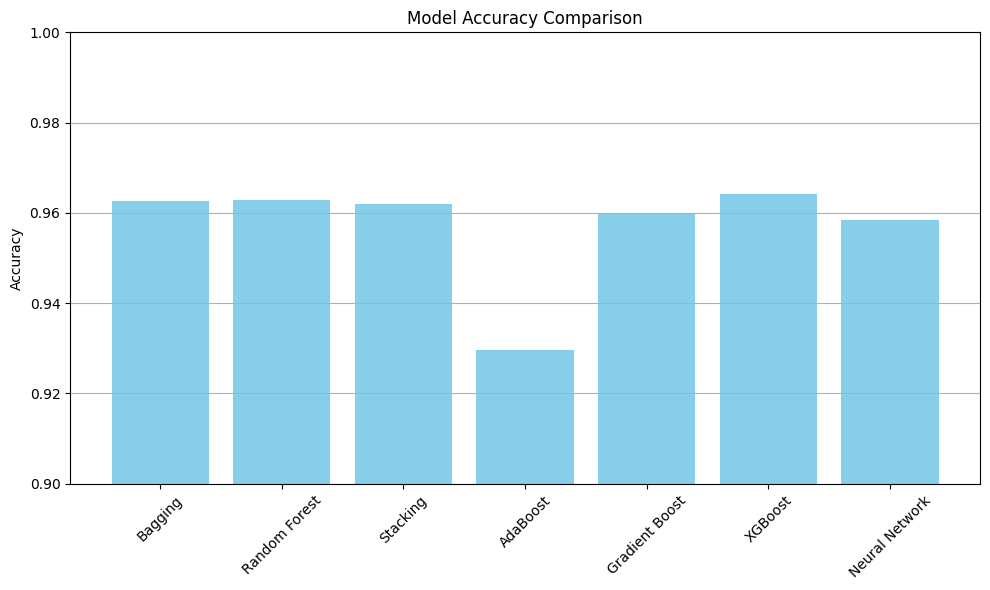


Best Model: XGBoost with accuracy 0.9641


In [21]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model} with accuracy {accuracies[best_model]:.4f}")

Thus after all our exploration we found that the model that performed the best is our XGBoost model with an accuracy of 94.64%

#### Final Model and Feature Importance

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train one XGBoost model
model = XGBClassifier(n_estimators= 200, learning_rate= 0.1)
model.fit(X_train, y_train)

# Predict
pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.4f}")

print(classification_report(y_test, pred))

Accuracy: 0.9641
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.94      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



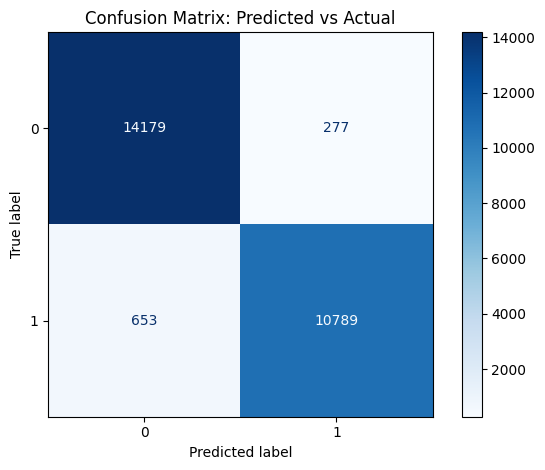

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues')
plt.title("Confusion Matrix: Predicted vs Actual")
plt.tight_layout()
plt.show()

From our best model we get an accuracy of 0.964 as well as a precision, recall, and f1-score of 0.96 indicating that the model performs consistently well across all key classification metrics, making it both accurate and reliable for predicting outcomes on unseen data.

Now that we have found and trained our best model we can answer the second question of this assignment; what factors are associated with passenger satisfaction? 

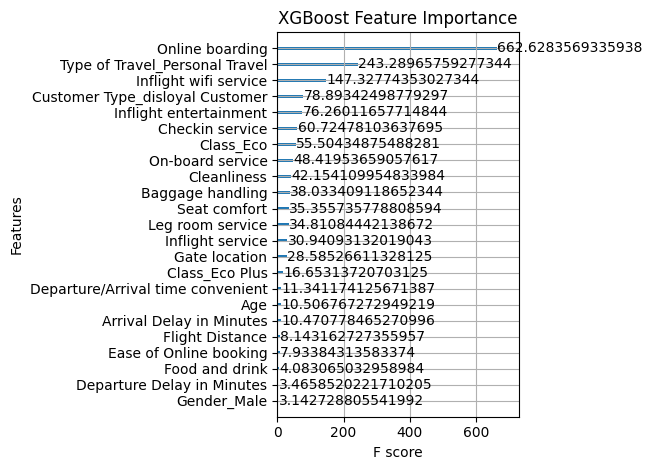

In [24]:
from xgboost import plot_importance

plot_importance(model, importance_type='gain')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

From the feature importance tool using XGBoost we are able to see that the top five features that matter the most to customer satisfaction are:
```
Online boarding
The type of travel person
Inflight wife service
Loyalty of the customer
Inflight entertainment
```